### Data Loader

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train_annot.csv', index_col=0)
df

,x1,y1,w,h,blur,expression,illumination,invalid,occlusion,pose,id,cnt,total
0,449,330,122,149,0,0,0,0,0,0,0--Parade/0_Parade_marchingband_1_849.jpg,0,1
1,361,98,263,339,0,0,0,0,0,0,0--Parade/0_Parade_Parade_0_904.jpg,0,1
2,78,221,7,8,2,0,0,0,0,0,0--Parade/0_Parade_marchingband_1_799.jpg,0,21
3,78,238,14,17,2,0,0,0,0,0,0--Parade/0_Parade_marchingband_1_799.jpg,1,21
4,113,212,11,15,2,0,0,0,0,0,0--Parade/0_Parade_marchingband_1_799.jpg,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159415,462,140,264,362,0,0,0,0,0,0,9--Press_Conference/9_Press_Conference_Press_C...,0,1
159416,362,108,214,277,0,0,0,0,0,0,9--Press_Conference/9_Press_Conference_Press_C...,0,1
159417,495,222,165,222,0,0,0,0,0,0,9--Press_Conference/9_Press_Conference_Press_C...,0,1
159418,244,46,510,614,0,0,0,0,0,0,9--Press_Conference/9_Press_Conference_Press_C...,0,1


In [3]:
df.occlusion

0         0
1         0
2         0
3         0
4         0
         ..
159415    0
159416    0
159417    0
159418    0
159419    0
Name: occlusion, Length: 159420, dtype: int64

In [4]:
df = df.astype({'x1': 'float32', 'y1': 'float32', 'w': 'float32', 'h': 'float32', 'blur': 'int', 'expression': 'bool', 'illumination': 'bool', 'invalid': 'bool', 
'occlusion': 'int', 'pose': 'bool', 'id': str, 'cnt': 'int', 'total': 'int'})
df.dtypes

x1              float32
y1              float32
w               float32
h               float32
blur              int64
expression         bool
illumination       bool
invalid            bool
occlusion         int64
pose               bool
id               object
cnt               int64
total             int64
dtype: object

In [5]:
df

,x1,y1,w,h,blur,expression,illumination,invalid,occlusion,pose,id,cnt,total
0,449.0,330.0,122.0,149.0,0,False,False,False,0,False,0--Parade/0_Parade_marchingband_1_849.jpg,0,1
1,361.0,98.0,263.0,339.0,0,False,False,False,0,False,0--Parade/0_Parade_Parade_0_904.jpg,0,1
2,78.0,221.0,7.0,8.0,2,False,False,False,0,False,0--Parade/0_Parade_marchingband_1_799.jpg,0,21
3,78.0,238.0,14.0,17.0,2,False,False,False,0,False,0--Parade/0_Parade_marchingband_1_799.jpg,1,21
4,113.0,212.0,11.0,15.0,2,False,False,False,0,False,0--Parade/0_Parade_marchingband_1_799.jpg,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159415,462.0,140.0,264.0,362.0,0,False,False,False,0,False,9--Press_Conference/9_Press_Conference_Press_C...,0,1
159416,362.0,108.0,214.0,277.0,0,False,False,False,0,False,9--Press_Conference/9_Press_Conference_Press_C...,0,1
159417,495.0,222.0,165.0,222.0,0,False,False,False,0,False,9--Press_Conference/9_Press_Conference_Press_C...,0,1
159418,244.0,46.0,510.0,614.0,0,False,False,False,0,False,9--Press_Conference/9_Press_Conference_Press_C...,0,1


### Data Analysis

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.font_manager as fm
%matplotlib inline
import seaborn as sns

In [7]:
# 1. occlusion 분포
v1_demo = (df.occlusion
           .value_counts(normalize=True)
           .multiply(100)
           .sort_index()
           .reset_index()
           .rename(columns={'index': 'occlusion', 'proportion': 'percent'})
)
v1_demo

,occlusion,percent
0,0,60.130473
1,1,17.457032
2,2,22.412495


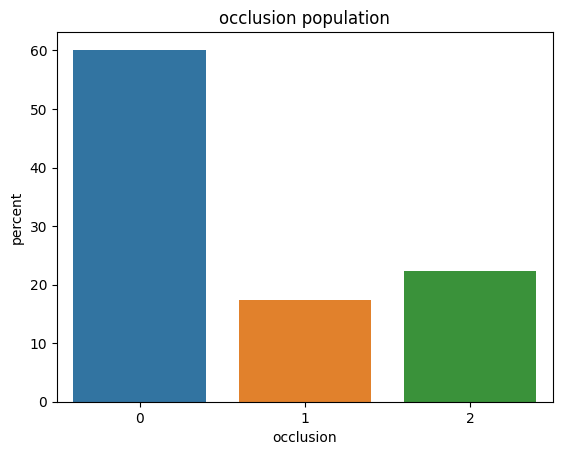

In [8]:
ax = sns.barplot(x='occlusion', y='percent', data=v1_demo)
ax.set_title('occlusion population')
plt.show()

In [9]:
base_path = "../../WIDER_train/images/"

#### case1. [1 person in 1 image] occlusion = 1

In [12]:
occ_1 = df[(df.occlusion==1) & (df.total < 2)].reset_index(drop=True)
occ_1

,x1,y1,w,h,blur,expression,illumination,invalid,occlusion,pose,id,cnt,total
0,310.0,851.0,421.0,487.0,0,False,False,False,1,False,0--Parade/0_Parade_marchingband_1_563.jpg,0,1
1,455.0,237.0,87.0,126.0,0,False,True,False,1,False,1--Handshaking/1_Handshaking_Handshaking_1_795...,0,1
2,489.0,290.0,20.0,15.0,2,False,False,False,1,True,1--Handshaking/1_Handshaking_Handshaking_1_102...,0,1
3,200.0,44.0,156.0,170.0,2,False,False,False,1,True,1--Handshaking/1_Handshaking_Handshaking_1_42.jpg,0,1
4,436.0,122.0,230.0,258.0,0,False,False,False,1,False,1--Handshaking/1_Handshaking_Handshaking_1_518...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,438.0,54.0,586.0,726.0,0,False,False,False,1,False,7--Cheering/7_Cheering_Cheering_7_757.jpg,0,1
280,439.0,403.0,257.0,382.0,0,False,False,False,1,False,8--Election_Campain/8_Election_Campain_Electio...,0,1
281,313.0,191.0,238.0,279.0,0,False,False,False,1,False,9--Press_Conference/9_Press_Conference_Press_C...,0,1
282,145.0,237.0,645.0,868.0,0,False,False,False,1,False,9--Press_Conference/9_Press_Conference_Press_C...,0,1


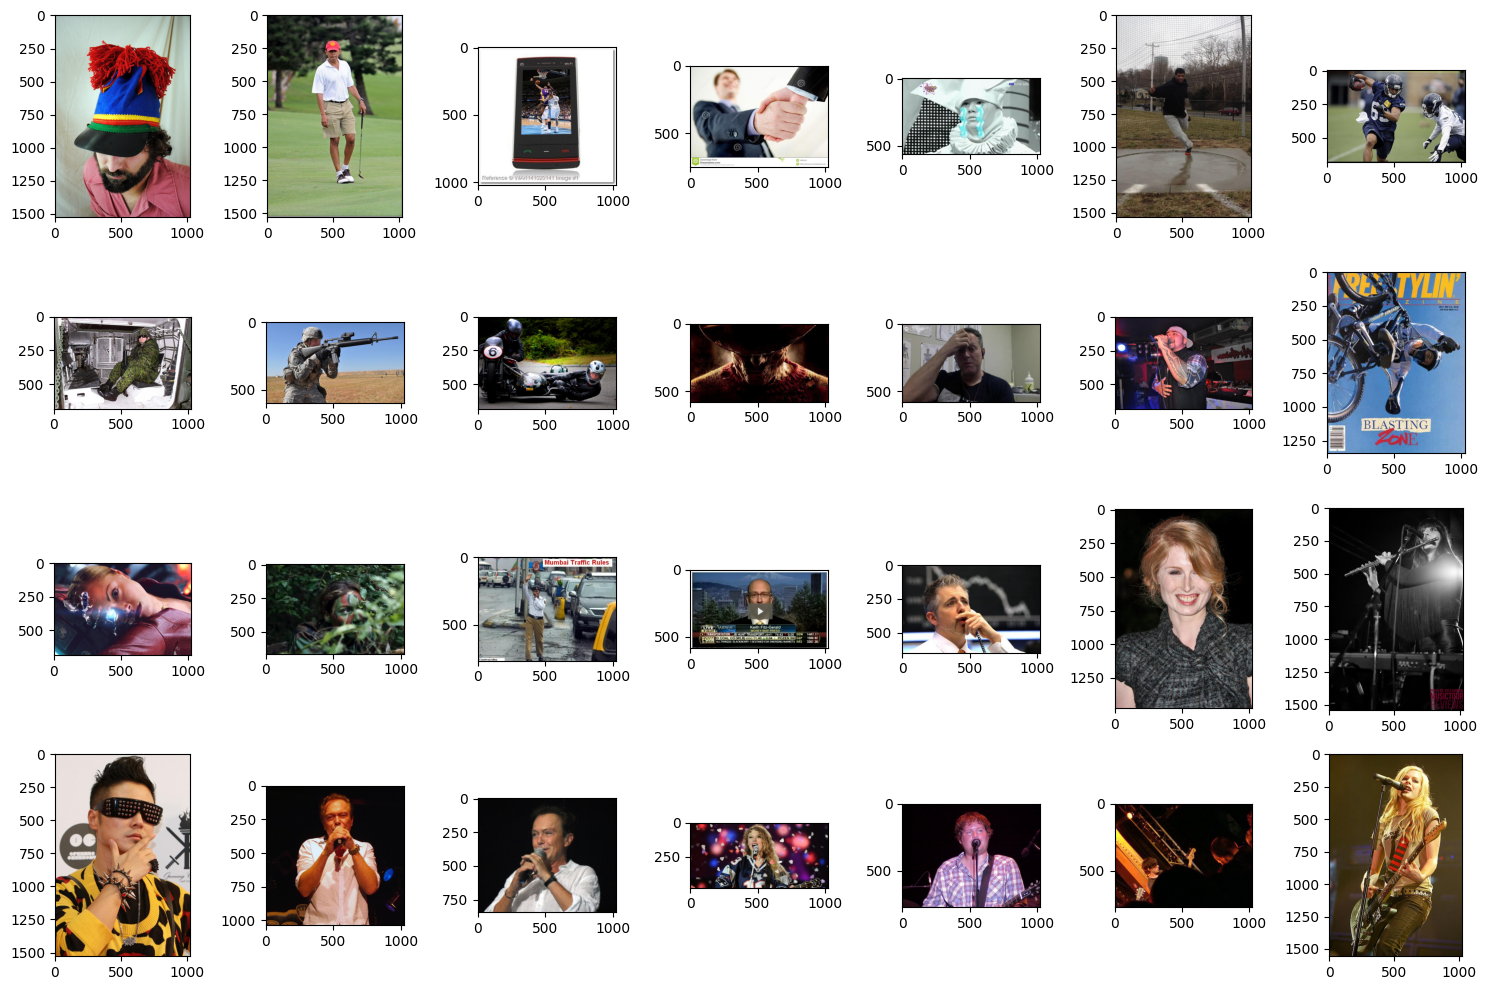

In [16]:
plt.figure(figsize=(15,10))
for i in range(1, 29):
    id = occ_1.id[i-1]
    plt.subplot(4, 7, i)
    plt.tight_layout()

    # plt.title("{}".format(occ_1.id))
    # plt.xlabel('x')
    # plt.ylabel('y')

    test_image = img.imread(base_path+id)
    ax = plt.imshow(test_image)
plt.show()

#### case2

In [18]:
occ_2 = df[(df.occlusion==2) & (df.total < 2)].reset_index(drop=True)
occ_2

,x1,y1,w,h,blur,expression,illumination,invalid,occlusion,pose,id,cnt,total
0,494.0,251.0,75.0,110.0,0,False,False,False,2,False,0--Parade/0_Parade_Parade_0_1040.jpg,0,1
1,414.0,118.0,300.0,378.0,0,False,False,False,2,False,0--Parade/0_Parade_marchingband_1_990.jpg,0,1
2,162.0,12.0,622.0,654.0,0,False,False,False,2,False,1--Handshaking/1_Handshaking_Handshaking_1_254...,0,1
3,672.0,54.0,100.0,146.0,0,False,False,False,2,False,10--People_Marching/10_People_Marching_People_...,0,1
4,358.0,126.0,60.0,114.0,1,False,False,False,2,False,12--Group/12_Group_Team_Organized_Group_12_Gro...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,383.0,131.0,118.0,159.0,1,False,False,False,2,False,6--Funeral/6_Funeral_Funeral_6_935.jpg,0,1
231,538.0,157.0,125.0,189.0,1,False,False,False,2,False,6--Funeral/6_Funeral_Funeral_6_623.jpg,0,1
232,228.0,78.0,62.0,98.0,0,False,False,False,2,False,61--Street_Battle/61_Street_Battle_streetfight...,0,1
233,372.0,195.0,186.0,252.0,0,False,False,False,2,False,61--Street_Battle/61_Street_Battle_streetfight...,0,1


In [19]:
# id = occ_2.id[0]
# test_image = img.imread(base_path+id)
# plt.imshow(test_image)

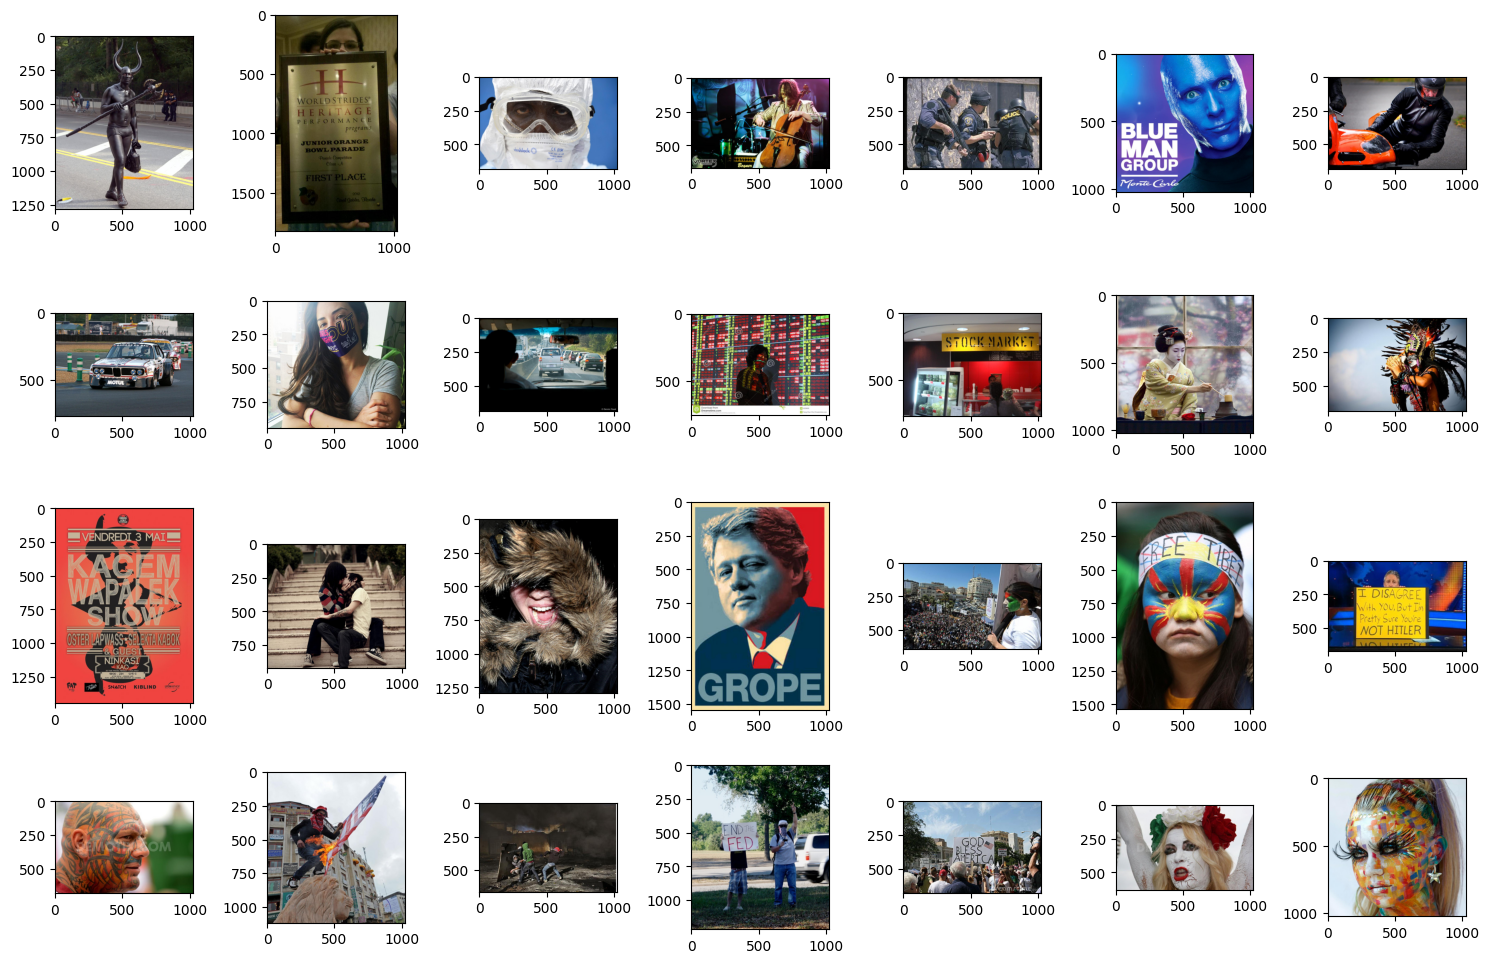

In [20]:
plt.figure(figsize=(15,10))
for i in range(1, 29):
    id = occ_2.id[i-1]
    plt.subplot(4, 7, i)
    plt.tight_layout()

    # plt.title("{}".format(occ_1.id))
    # plt.xlabel('x')
    # plt.ylabel('y')

    test_image = img.imread(base_path+id)
    ax = plt.imshow(test_image)
plt.show()